# Simulateur de traffic routier

## Partie 0 : Introduction et plan d'action

Dans un monde en pleine croissance, les gestionnaires des infrastructures routières ont du mal à suvire l'évolution du nombre d'usagers, causant ainsi des embouteillages plus long et plus fréquents. 
Ces bouchons sont à l'origines de nombreux problèmes sur les individus de notre sociétè moderne : stress, polution sonore, fatigue etc...
Mais constitue surtout une énorme perte de temps et donc d'argent, on estime la perte à 5,9 M€ par an https://www.leparisien.fr/societe-transport-les-embouteillages-coutent-6-milliards-d-euros-par-an-a-l-economie-17-12-2013-3417529.php
Il est donc essentiel de maitriser ces phénomènes afin de mieux les controler et de mettre en place des actions pour minimiser leur apparition.  
De ce constat les mathématiciens s'essayent à la modélisation du traffic routier depuis plus de 100 ans, et proposent régulièrement des relations se rapprochant au plus de la réalité. Cependant, la multitude de paramètres rend l'évolution du trafic presque imprévisible. Par conséquent, l'ordinateur se révèle être le seul capable de modéliser le trafic routier.

### Objectif : Construire une simulation du traffic routier

**Temps 1: Création de la simulation pour un cas simple**

*Sprint 1*

- [x] Documentation
- [x] Définir un cas d'étude
- [x] Définir quels sont les élements constitutifs d'une route
- [x] Définir comment on modélisera notre simulateur
- [x] Ecrire un résumé pour expliquer nos hypothéses et notre modèle
- [x] Traduire notre cas d'étude en code
- [x] Détailler le résumer pour que tout le monde comprennent

*Sprint 2*

- [x] Faire tout le code pour des routes 1 voie
- [x] Coder les priorités
- [x] Fonction des feux rouges
- [x] Fonction des départ
- [x] Fonction des fin
- [x] fonction des intersections **INUTILE**
- [x] Fonction direction avec les probas
- [x] Fonction intersection
- [x] Rajouter les sécurités pour pas sortir du tableau
- [x] Fonction mouvement
- [x] Debuger

**Temps 2 : Généralisation et visualisation des résultats**

*Sprint 1*

*Sprint 2*

**Temps 3 : Interface graphique facilitant la génération de route**

*Sprint 1*

*Sprint 2*

**Temps 4 : Autopromation des éléments**


## Partie 1 : Modélisation de la route

Afin d'assurere le bon focntionnement de notre simulation nous avons besoin d'une route ! Cela parait évident mais la manière dont nous modéliseront notre route déterminera la compléxité de notre projet : plus le modéle sera simple plus la simulation sera facile à mettre en place. 
<br>

Ma première approche (naïve) a été de prendre une route quelconque et de la reproduire dans une matrice où chaque éléments seraient un rectangle de largeur la route et de longeur arbitraire que l'on aurait put choisir pour affiner le modéle. Les élements possibles seraient les 2 seraient une voiture, les 1 une route et les 0 pour les cases vide. 


<div style="text-align: center;">
    <img src="Banque_image_notebook\Version_1.jpg" width="800"/>
    <br>
    <u> Image 2 : Première version de la modélisation de la route</u>
</div>

Certes cette approche permet de retranscrire au mieux notre route étudiée, mais elle rend la manipulation de notre modéle complexe. Notament dans les virages et routes inclinées où le sens de circulation serait difficile à identifier. 
<br>

Ainsi pour que cette solution fonctionne il faudrait que toutes les routes soient droites ! Meme si cele parait surprenant ce n'est pas en soit une mauvaise idée. En effet notre objectif principal est de faire une simulation du traffic routier, mais à t-on besoin pour cela de reproduire la route à l'identique ? La réponse à cette question est non et une approche plus simple serait de transformer toutes les routes courbées et virages en ligne droite de meme dimension. Cela n'infulencerai pas les résultats mais simplifirai nettement la modélisation. En suivant ce résonnement j'ai imaginé un modéle ou tous les virages seraient dépliés pour devenir des lignes droites : 

<div style="text-align: center;">
    <img src="Banque_image_notebook\Version_2.jpg" width="800"/>
    <br>
    <u> Image 3 : Seconde version de la modélisation de la route</u>
</div>

Cette approche aporte de nombreux avantages dans la modélisation de notre route : 
- Simple à mettre en place
- Sens de circulation facilement devinable
- Manipulation simple par un programme tiers  

Cependant, mettre en place cette modélisation revient à s'assurer que toutes les routes peuvent être "dépliées" pour devenir une ligne droite. Ce qui n'est pas le cas en général. 

*Contre exemple :*

<div style="text-align: center;">
    <img src="Banque_image_notebook\Contreex_route_droite.jpg" width="800"/>
    <br>
    <u> Image 4 : Contre exemple</u>
</div>

Pour contourner ce problème j'ai eu l'idée de découper la route par blocs. Chaque blocs conrrespondrait à un élément de la route : une intersection, une route, un feu rouge, une priorité, un passage piéton etc... 

<div style="text-align: center;">
    <img src="Banque_image_notebook\Version_3.jpg" width="800"/>
    <br>
    <u> Image 5 : Troisième version de la modélisation de la route</u>
</div>

L'avantage de ce modéle est qu'il reprend tous les avantages de la méthode précédentes et solutionne le probléme des routes non orthogonalisable. 

*Limites:*

Ce modéle à ces limites car un bloc n'a que 4 cotés ce qui sous-entend dans notre cas qu'il n'existe pas d'intersection à plus de 4 voies n'existe pas. 

<div style="text-align: center;">
    <img src="Banque_image_notebook\Intersection_5voies.jpg" width="800"/>
    <br>
    <u> Image 6 : Intersection à 5 voies </u>
    <br>
    [Source: https://blog.northgate.fr/category/dans-le-coin/region-parisienne/]
</div>

Ce qui est sur c'est que ce genre d'intersections sont rares, alors on choisira cette apporche pour modéliser notre route dans tout le reste de notre projet.



### Structure du modéle

Comme décrit précdement notre modéle sera un assemblage de blocs que l'on représentera dans une matrice. Chaque élément de la matrice sera donc un éléement de la route et devra respecter la syntaxe suivante :

Element = ["Type" = str, sens de circulation = {0,1,2,3}, Caractéristique du type = int]

<div style="text-align: center;">
    <img src="Banque_image_notebook\Sens_circulation.jpg" width="800"/>
    <br>
    <u> Image 7 : Explication sens de circulation </u>
</div>

Ainsi, si un usager veut aller vers le 0 alors le sens de ciculation sera 0.

Détail pour chaque élements :

- Route = ['Route', sens de circulation, longeur]
- Intersection = ['Intersection']
- Feux rouges = ['Feu', sens de circulation, cycles en secondes, Vert/Rouge]
- priorité = ['Priorite']
- Passage piéton = ['Passage', sens de circulation, débit H/m]
- Début = ['Debut', sens de circulation, débit V/m]
- Fin = ['Fin']

Cependant ces élements ne permetent pas de représenter ni de traiter l'évolution du traffic. C'est pourquoi il faut joindre à cette matrice un matrice 'traffic' permettant de modéliser l'évolution du traffic en temps réel.

Pour chaque élément on associera une liste qui répresentera le traffic de le manière suivantes :

Traffic_élément = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1]

Les 0 sont des espaces vides et les 1 des emplacements occupés. 

La taille des listes est défini de la manière suivante : 

    Si route alors:
        taille = longeur_route/4,36
    Sinon:
        taille = 1

Enfin il faut prendre en compte les intentions des utilisateurs : plutôt à gauche ou à droite ?

Pour cela on créera une matrice 'direction' qui pour chaque éléments indiquera la probabilité d'aller dans chaque direction {0,1,2,3}, ainsi que la direction choisi.

Direction_élément = [Proba = [0,0,0,0], Direction = 0]


### Cas d'étude


<div style="text-align: center;">
    <img src="Banque_image_notebook\Cas_etude_feux.png" width="800"/>
    <br>
    <u> Image 7 : Explication sens de circulation </u>
</div>

En suivant les régles du découpagev on obtient le schéma suivant :




In [1]:
Route_02 = ["Fin"]
Route_03 = ["Intersection"]
Route_04 = ["Intersection"]
Route_05 = ['Feu', 0, 30, True]
Route_06 = ["Route", 0]
Route_07 = ["Depart", 0, 5]
Route_10 = ["Depart", 2, 5]
Route_11 = ["Route", 2]
Route_12 = ['Feu', 2, 30, True]
Route_13 = ["Intersection"]
Route_14 = ["Intersection"]
Route_15 = ["Fin"]
Route_23 = ["Fin"]
Route_24 = ["Feu", 3, 30, False]
Route_34 = ["Route", 3]
Route_44 = ["Depart", 3, 5]

Traffic_02 = [0]
Traffic_03 = [0]
Traffic_04 = [0]
Traffic_05 = [0]
Traffic_06 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Traffic_07 = [0]
Traffic_10 = [0]
Traffic_11 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Traffic_12 = [0]
Traffic_13 = [0]
Traffic_14 = [0]
Traffic_15 = [0]
Traffic_23 = [0]
Traffic_24 = [0]
Traffic_34 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Traffic_44 = [0]

Direction_02 = []
Direction_03 = []
Direction_04 = []
Direction_05 = [[0.5, 0.5, 0, 0], 0]
Direction_06 = [[1, 0, 0, 0], 0]
Direction_07 = [[1, 0, 0, 0], 0]
Direction_10 = [[0, 0, 1, 0], 0]
Direction_11 = [[0, 0, 1, 0], 0]
Direction_12 = [[0, 0.5, 0.5, 0], 0]
Direction_13 = []
Direction_14 = []
Direction_15 = []
Direction_23 = []
Direction_24 = [[0.5, 0, 0.5, 0], 0]
Direction_34 = [[0, 0, 0, 1], 0]
Direction_44 = [[0, 0, 0, 1], 0]

route = [
    [0, 0, Route_02, Route_03, Route_04, Route_05, Route_06, Route_07],
    [Route_10, Route_11, Route_12, Route_13, Route_14, Route_15, 0, 0],
    [0, 0, 0, Route_23, Route_24, 0, 0, 0],
    [0, 0, 0, 0, Route_34, 0, 0, 0],
    [0, 0, 0, 0, Route_44, 0, 0, 0],
]

traffic = [
    [0, 0, Traffic_02, Traffic_03, Traffic_04, Traffic_05, Traffic_06, Traffic_07],
    [Traffic_10, Traffic_11, Traffic_12, Traffic_13, Traffic_14, Traffic_15, 0, 0],
    [0, 0, 0, Traffic_23, Traffic_24, 0, 0, 0],
    [0, 0, 0, 0, Traffic_34, 0, 0, 0],
    [0, 0, 0, 0, Traffic_44, 0, 0, 0],
]

direction = [
    [0, 0, Direction_02, Direction_03, Direction_04, Direction_05, Direction_06, Direction_07],
    [Direction_10, Direction_11, Direction_12, Direction_13, Direction_14, Direction_15, 0, 0],
    [0, 0, 0, Direction_23, Direction_24, 0, 0, 0],
    [0, 0, 0, 0, Direction_34, 0, 0, 0],
    [0, 0, 0, 0, Direction_44, 0, 0, 0],
]

temps = 0

## Modèle physique

Retouver graph dans la doc mais en gros un utlisateur avance si devatn lui il y a au moins une distance suffisante + 1s de temps de réponse.

On a besoin de créer un module qui permet de faire bouger des voitures selon ces régles dans le bloc transport de chaque éléments.

Pour rappel le mouvement des voitures se fera de la gauche ver la droite ainsi la première voiture à bouger est la dernière dans la liste.

Chaque itération vaut 1 seconde.

### Hypothèses

Les voitures ne se déplace pas dinstantanément il y a un effet de 'chaine', ainsi il faudra à minima un 0 devant un & pour qu'il puisse avancer

In [2]:
# Tous les imports et variables

import copy
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random

### Faire vivre la route

In [3]:
def update_direction():

    for i in range(len(route)):
        for j in range(len(route[i])):
            if route[i][j] != 0:
                if route[i][j][0] != "Fin" and route[i][j][0] != "Intersection":
                    direction[i][j][1] = random.choices(
                        [0, 1, 2, 3], weights=direction[i][j][0], k=1
                    )[0]


def update_départ():

    global temps

    for i in range(len(route)):
        for j in range(len(route[i])):
            if route[i][j] != 0:
                if route[i][j][0] == "Depart":
                    if random.random() <= route[i][j][2]/60:
                        traffic[i][j][0] += 1


def update_feux_rouges():

    global temps

    for i in range(len(route)):
        for j in range(len(route[i])):
            if route[i][j] != 0:
                if route[i][j][0] == "Feu":
                    if (temps % route[i][j][2]) == 0:
                        route[i][j][3] = not (route[i][j][3])

def update_route():
    update_direction()
    update_départ()
    update_feux_rouges()

"""Fonction qui retourne le chemin pour sortir des intersections"""

def chemin_intersection(pos_x, pos_y):

    pos = route[pos_x][pos_y][1]
    dir = direction[pos_x][pos_y][1]

    if pos == dir:
        return [pos, pos]

    if pos == (dir + 1) % 4:
        return [dir]

    if dir == (pos + 1) % 4:
        return [pos, dir, dir]

Premiere étape faire passer les voitures qui sont arrivées à la fin de l'élement vers les blocs adjacents libres  
On vient examiner chaque élément de la route  
Chaque élémént à sa particularité:  
Route il suffit que l'espace adjacent soit libre  
Feu rouge il faut que le feu soit vert et qu'il n'y est personne en face  
Priorité en fonction des intention de l'utilisateur il faut que il n'y est personne sur l'extrémitée des routes qui coupe la priorité  
Intersection en fonction des intentions de l'utilisateur il faut que le bloc concerné soit libre  
Départ et fin à part  
La fin est un bloc tout le temps disponible  
Plus règle de la prioritée à droite  
Il faudrait faire l'inventaire des voitures qui veulent changer d'élément avec destination associé  
Les éléments devrait également être classé par ordre de prorité  
Syntaxte des éléments des priorité [pos de départ, pos d'arrivé, vers intersection ]
Le classement des prioirités ne concerne que les blocs qui veulent aller sur les blocs intersections
Chaque utilisateur est indépendant

Cette fonction prioruté est la fonction la plus suceptible d'améliroation afin de prendre en compte au maximum de l'aspect humain

'''Fonction pour les priorités objectif on veut un tableau qui classe par ordre croissant de priorité les inteentiosn des utilisateurs
voulant changer de bloc'''
'''Etape 1 : Faire l'inventaire de toutes les intentiosn des utilisateurs'''
'''Attention on dit que l'utilsateur à une intention si il peut réaliser sont action c'est à dire si les conditons définit précedement'''
'''Sont remplis'''

fonction chemin_intersection à développer plus tard pour extrapoler a plus de 4 blocs intersections collé


In [4]:
"""Donne la liste des intentions"""


def intentions():

    res = []

    for i in range(len(route)):
        for j in range(len(route[i])):
            if route[i][j] != 0:
                if traffic[i][j][-1] >= 1:
                    """Pour la route et les départ la voiture voudra toujour suivre la direction aucune perturbation n'est à prévoir"""
                    """Les questions de priorité se pose généralement sur les bloc intersections ou feu rouge ou priorité"""
                    if route[i][j][0] == "Route" or route[i][j][0] == "Depart":
                        dir_route = route[i][j][1]
                        if dir_route == 0:
                            res.append([i, j, i, j - 1])
                        elif dir_route == 1:
                            res.append([i, j, i + 1, j])
                        elif dir_route == 2:
                            res.append([i, j, i, j + 1])
                        else:
                            res.append([i, j, i - 1, j])

                    """Pour les intersections ca se complique en effet il faut faire attention au priorité à droite"""
                    """La prioirité à droite s'applique si le bloc à droite de la destination est une route occupée"""
                    """De ce fait sur une intersection on peut avancer si le bloc à droite de la destination n'est pas une route"""
                    """Ou alors c'est une route non occupée"""
                    """Dépend de la direction et c'est la où c'est plus chaud matrice des chemins"""
                    if route[i][j][0] == "Intersection":
                        if traffic[i][j][0] == 1:
                            dir_inter = direction[i][j][0]
                            if dir_inter == 0:
                                if 0 <= i - 1 <= len(route) and 0 <= j - 1 <= len(
                                    route[i]
                                ):
                                    if route[i - 1][j - 1] != 0:
                                        if route[i - 1][j - 1][0] != "Route":
                                            res.append([i, j, i, j - 1])
                                        elif traffic[i - 1][j - 1][-1] == 0:
                                            res.append([i, j, i, j - 1])
                                    else:
                                        res.append([i, j, i, j - 1])
                                else:
                                    res.append([i, j, i, j - 1])
                            elif dir_inter == 1:
                                if 0 <= i + 1 <= len(route) and 0 <= j - 1 <= len(
                                    route[i]
                                ):
                                    if route[i + 1][j - 1] != 0:
                                        if route[i + 1][j - 1][0] != "Route":
                                            res.append([i, j, i + 1, j])
                                        elif traffic[i + 1][j - 1][-1] == 0:
                                            res.append([i, j, i + 1, j])
                                    else:
                                        res.append([i, j, i + 1, j])
                                else:
                                    res.append([i, j, i + 1, j])
                            elif dir_inter == 2:
                                if 0 <= i + 1 <= len(route) and 0 <= j + 1 <= len(
                                    route[i]
                                ):
                                    if route[i + 1][j + 1] != 0:
                                        if (
                                            route[i + 1][j + 1][0] != "Route"
                                            or traffic[i + 1][j + 1][-1] == 0
                                        ):
                                            res.append([i, j, i, j + 1])
                                    else:
                                        res.append([i, j, i, j + 1])
                                else:
                                    res.append([i, j, i, j + 1])
                            else:
                                if 0 <= i - 1 <= len(route) and 0 <= j + 1 <= len(
                                    route[i]
                                ):
                                    if route[i - 1][j + 1] != 0:
                                        if (
                                            route[i - 1][j + 1][0] != "Route"
                                            or traffic[i - 1][j + 1][-1] == 0
                                        ):
                                            res.append([i, j, i - 1, j])
                                    else:
                                        res.append([i, j, i - 1, j])
                                else:
                                    res.append([i, j, i - 1, j])

                    """Feux rouges : pour les feux rouges il va dans la direction si le feu est vert"""
                    """Attention execption si le feu rouge est relier à une intersection"""
                    """Et que celle-ci est pleine (voiture sur la gauche) alors on le laisse passer = évite les blocages"""
                    if route[i][j][0] == "Feu":
                        if route[i][j][-1] == True:
                            dir_feu = route[i][j][1]
                            if dir_feu == 0:
                                if 0 <= i + 1 <= len(route) and 0 <= j - 1 <= len(
                                    route[i]
                                ):
                                    if route[i][j - 1] != 0:
                                        if (
                                            route[i][j - 1][0] == "Intersection"
                                            and traffic[i + 1][j - 1][-1] == 0
                                        ):
                                            res.append([i, j, i, j - 1])
                                    else:
                                        res.append([i, j, i, j - 1])
                                else:
                                    res.append([i, j, i, j - 1])
                            elif dir_feu == 1:
                                if 0 <= i + 1 <= len(route) and 0 <= j + 1 <= len(
                                    route[i]
                                ):
                                    if route[i + 1][j] != 0:
                                        if (
                                            route[i + 1][j][0] == "Intersection"
                                            and traffic[i + 1][j + 1][-1] == 0
                                        ):
                                            res.append([i, j, i + 1, j])
                                    else:
                                        res.append([i, j, i + 1, j])
                                else:
                                    res.append([i, j, i + 1, j])
                            elif dir_feu == 2:
                                if 0 <= i - 1 <= len(route) and 0 <= j + 1 <= len(
                                    route[i]
                                ):
                                    if route[i][j + 1] != 0:
                                        if (
                                            route[i][j + 1][0] == "Intersection"
                                            and traffic[i - 1][j + 1][-1] == 0
                                        ):
                                            res.append([i, j, i, j + 1])
                                    else:
                                        res.append([i, j, i, j + 1])
                                else:
                                    res.append([i, j, i, j + 1])
                            else:
                                if 0 <= i - 1 <= len(route) and 0 <= j - 1 <= len(
                                    route[i]
                                ):
                                    if route[i - 1][j] != 0:
                                        if (
                                            route[i - 1][j][0] == "Intersection"
                                            and traffic[i - 1][j - 1][-1] == 0
                                        ):
                                            res.append([i, j, i - 1, j])
                                    else:
                                        res.append([i, j, i - 1, j])
                                else:
                                     res.append([i, j, i - 1, j])

                    """Pour les priorités suivant la direction il faut :"""
                    """Si le choix de la desico, implique de couper 1 seule route alors il faut qu'il n'y est personne sur la voie coupé"""
                    """On estime qu'une voie est libre si il y a 3 emplacement vacants"""
                    """Si le choix implique de couper """
                    if route[i][j][0] == "Priorite":
                        sens_prio = route[i][j][1]
                        dir_prio = direction[i][j][1]
                        """Cas 1 voie coupé """
                        if dir_prio == (sens_prio + 1) % 4:
                            if sens_prio == 0:
                                if (
                                    0 <= i + 1 <= len(route)
                                    and 0 <= i + 2 <= len(route)
                                    and 0 <= j - 1 <= len(route[i])
                                ):
                                    if (
                                        traffic[i + 1][j - 1][-1] == 0
                                        and traffic[i + 2][j - 1][-1] == 0
                                        and traffic[i + 2][j - 1][-2] == 0
                                    ):  # ATTENTION NE MARCHE QUE POUR NOTRE CAS A MODIFIER SI GENERALISATION
                                        res.append([i, j, i, j - 1])
                            elif sens_prio == 1:
                                if (
                                    0 <= i + 1 <= len(route)
                                    and 0 <= j + 1 <= len(route)
                                    and 0 <= j + 2 <= len(route[i])
                                ):
                                    if (
                                        traffic[i + 1][j + 1][-1] == 0
                                        and traffic[i + 1][j + 2][-1] == 0
                                        and traffic[i + 1][j + 2][-2] == 0
                                    ):  # ATTENTION NE MARCHE QUE POUR NOTRE CAS A MODIFIER SI GENERALISATION
                                        res.append([i, j, i + 1, j])
                            elif sens_prio == 2:
                                if (
                                    0 <= i - 1 <= len(route)
                                    and 0 <= i - 2 <= len(route)
                                    and 0 <= j + 1 <= len(route[i])
                                ):
                                    if (
                                        traffic[i - 1][j + 1][-1] == 0
                                        and traffic[i - 2][j + 1][-1] == 0
                                        and traffic[i - 2][j + 1][-2] == 0
                                    ):  # ATTENTION NE MARCHE QUE POUR NOTRE CAS A MODIFIER SI GENERALISATION
                                        res.append([i, j, i, j + 1])
                            else:
                                if (
                                    0 <= i - 1 <= len(route)
                                    and 0 <= j - 1 <= len(route)
                                    and 0 <= j - 2 <= len(route[i])
                                ):
                                    if (
                                        traffic[i - 1][j - 1][-1] == 0
                                        and traffic[i - 1][j - 2][-1] == 0
                                        and traffic[i - 1][j - 2][-2] == 0
                                    ):  # ATTENTION NE MARCHE QUE POUR NOTRE CAS A MODIFIER SI GENERALISATION
                                        res.append([i, j, i - 1, j])

    return res


### Mouvement

In [5]:
def mouvement(n):

    global temps

    for _ in range(n):

        """Pour rappel la route est une matrice 2x2"""

        update_route()

        ref_traffic = copy.deepcopy(traffic)

        intention = intentions()

        for i in range(len(intention)):
            x = intention[i][0]
            y = intention[i][1]
            nx = intention[i][2]
            ny = intention[i][3]

            # Cas particulier départ autres blocs
            if route[x][y][0] == "Depart":
                if traffic[nx][ny][0] == 0:
                    traffic[nx][ny][0] += 1
                    traffic[x][y][-1] -= 1

            # Cas particulier intersection->intersection
            elif route[nx][ny][0] == "Intersection" and route[x][y][0] == "Intersection":
                if traffic[nx][ny][0] == 0 and ref_traffic[nx][ny][0] == 0:
                    direction[nx][ny] = direction[x][y][1::]
                    direction[x][y] = []
                    traffic[nx][ny][0] += 1
                    traffic[x][y][-1] -= 1

                # Cas particulier non/intersection->intersection
            elif (
                route[nx][ny][0] == "Intersection" and route[x][y][0] != "Intersection"
            ):
                if traffic[nx][ny][0] == 0 and ref_traffic[nx][ny][0] == 0:
                    direction[nx][ny] = chemin_intersection(x, y)
                    traffic[nx][ny][0] += 1
                    traffic[x][y][-1] -= 1

            # Cas particulier intersection->non-intersection
            elif route[nx][ny][0] != "Intersection" and route[x][y][0] == "Intersection":
                if route[nx][ny][0] == 'Fin':
                    direction[x][y] = []
                    traffic[nx][ny][0] += 1
                    traffic[x][y][-1] -= 1
                elif traffic[nx][ny][0] == 0 and ref_traffic[nx][ny][0] == 0:    
                    direction[x][y] = []
                    traffic[nx][ny][0] += 1
                    traffic[x][y][-1] -= 1

                # Cas général
            else:
                if route[nx][ny][0] == 'Fin':
                    traffic[nx][ny][0] += 1
                    traffic[x][y][-1] -= 1
                elif traffic[nx][ny][0] == 0 and ref_traffic[nx][ny][0] == 0:    
                    traffic[nx][ny][0] += 1
                    traffic[x][y][-1] -= 1

        for i in range(len(route)):
            for j in range(len(route[i])):
                if route[i][j] != 0:
                    if route[i][j][0] == "Route":
                        for k in range(2, len(traffic[i][j]) + 1):
                            if (
                                traffic[i][j][-k] == 1
                                and traffic[i][j][-k + 1] == 0
                                and ref_traffic[i][j][-k + 1] == 0
                            ):
                                traffic[i][j][-k + 1] += 1
                                traffic[i][j][-k] -= 1

        temps += 1


### Simulation

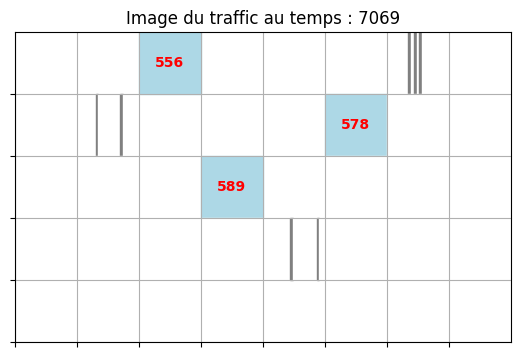

In [79]:
def simulation():
    
    traffic_matrix = traffic
    
    # Taille de la matrice
    n_rows = len(traffic_matrix)
    n_cols = len(traffic_matrix[0])

    # Créer une figure et des axes
    fig, ax = plt.subplots()

    # Calcul du facteur de mise à l'échelle pour la largeur
    # Trouver la plus grande longueur de route dans la matrice
    max_route_length = max([len(item) if isinstance(item, list) and len(item) > 1 else 1 for row in traffic_matrix for item in row])

    # Parcourir la matrice et ajouter des éléments graphiques
    for i in range(n_rows):
        for j in range(n_cols):
            value = traffic_matrix[i][j]
            
            # Si c'est une case vide (0)
            if value == 0:
                ax.add_patch(patches.Rectangle((j, n_rows - 1 - i), 1, 1, fill=True, color='white'))
            
            # Si c'est une voiture simple (1)
            elif value == [1]:
                ax.add_patch(patches.Rectangle((j, n_rows - 1 - i), 1, 1, fill=True, color='black'))
            
            # Si c'est une route (liste avec plusieurs valeurs)
            elif isinstance(value, list) and len(value) > 1:
                route_len = len(value)
                
                # Adapter la largeur des sous-cases pour que toutes les sous-cases tiennent dans une case
                sub_w = 1 / route_len  # Largeur de la sous-case
                
                # Diviser la case en plusieurs sous-cases pour chaque élément de la route
                for k, sub_value in enumerate(value):
                    sub_x = j + (k * sub_w)  # Position en x de la sous-case
                    if sub_value == 1:
                        # Colorier la sous-case et son contour
                        ax.add_patch(patches.Rectangle((sub_x, n_rows - 1 - i), sub_w, 1, 
                                                    fill=True, color='Grey'))
                    else:
                        # Colorier une sous-case vide avec un contour coloré
                        ax.add_patch(patches.Rectangle((sub_x, n_rows - 1 - i), sub_w, 1, 
                                                    fill=True, color='white'))
            
            # Si c'est une zone de départ ou fin (nombre > 1)
            elif isinstance(value, list) and value[0] > 1:
                ax.add_patch(patches.Rectangle((j, n_rows - 1 - i), 1, 1, fill=True, color='lightblue'))
                # Annoter la case avec le nombre correspondant
                ax.text(j + 0.5, n_rows - 1 - i + 0.5, str(value[0]), color='red', weight='bold', ha='center', va='center')

    # Réglages de la grille
    ax.set_xlim(0, n_cols)
    ax.set_ylim(0, n_rows)
    ax.set_xticks(np.arange(0, n_cols, 1))
    ax.set_yticks(np.arange(0, n_rows, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    # Afficher la figure
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("Image du traffic au temps : " + str(temps))
    plt.show()

mouvement(1)
simulation()
